# COGS 108 - Final Project

## Group Members and Contributions

 - A13457606 - Part 3 Data Cleaning, Part 4 Visualizations, Miscellaneous
 
 - A13433190 - Part 1 Intro & Background, Part 2 Data Wrangling, gathering + loading .csv files, Part 3 Data Cleaning, and Part 6 Privacy concerns 
     
 - A13758500 - Part 1 Intro & Background, Part 2 Data Wrangling, Part 3 Data Cleaning, Part 4 Data Visualization
 
 - A13482251 - Part 3 Data Cleaning, Part 4 Visualizations, Miscellaneous
 
 - A14005438 - Part 5 Data Analysis, Part 7 Conclusion and Discussion, Miscellaneous
 
 - A13543356 - Part 5 Data Analysis, Part 7 Conclusion and Discussion, Miscellaneous


## Part 1 - Introduction and Background 



The emergence of the Golden State Warriors as a powerhouse team in the NBA has opened up a major dialogue surrounding the recent increase in influence of the 3 point shot in the NBA. There are a multitude of articles that suggest that the 3-pointer plays a crucial role in today's style of basketball. This assertion is an important one because at the time of it's inception many players and coaches wrote the 3-point shot off as a "gimmick" and chose to continue prioritizing 2-pointers in their gameplay. Additionally, this recent shift away from close range shots has also affected which positions are important, which has been discussed at length by NBA announcers and analysts.

This topic is of particular significance to our group because we all share a love for sports and as fans we are interested in combining sports statistics with data science applications. 

We are curious to see if the data and our conclusions supports the idea that 3 pointer driven gameplay, as practiced by the Warriors, has really revolutionized the game of basketball. Mathematically speaking, there is a major incentive to apply the 3 point focused game strategy. Today, many recognize that taking the shot that is worth 50% more will have a pay-off even if the shot itself is a little more difficult to make (lower 3 point percentage than 2 point percentage). However, we want to see whether or not real world data supports this statistical claim and what, if any, new or alternate conclusions we can make based on our findings. 

### Revised Research Question

Through our analysis of NBA team statisitcs we seek to determine which game strategy is more effective, and explore the ways in which the best strategy has changed throughout NBA history. The specific game strategies we will be examining in this project are 3 point versus 2 point heavy game styles. The comparison of these two strategies will be normalized for each season because we know that initially 3 point shots were not commonly attempted and have increased in popularity over time. We are defining "effectiveness" as how many 3 pt shot attempts each playoff team had per season, compared to the league average that season. 

### Hypothesis 

We predict that since the introduction of the 3 point shot in 1979 the best game strategy has become taking more 3 point shots. As the league average of 3 point shots attempted has steadily increased it make sense that in order to win games regularly a team has to adopt a 3 point driven strategy. 

It will be fascinating to see at which point there is a shift away from 2 point focused gameplay to 3 point focused gameplay in the NBA as a whole and how long it took for individual teams to make the shift. With our results we might also be able to establish an optimal balance between 3-point and 2-point shots (a combination of the two strategies) that would lead to the highest effectiveness in the NBA today. We predict that given the nature of gameplay seen in the NBA today this ideal strategy will most likely be more focused on attempting 3-pointers than close range shots. 

## Part 2 - Data Wrangling 

The bulk of our data is sourced from https://www.basketball-reference.com/. We will need to gather a table of data for every season in order to effectively analyze the evolution of basketball strategies over time. We will be exploring the data for each season by team starting in 1979 (the year the 3 point shot was introduced). Basketball-Reference provides tables that include 

In [1]:
# Important Imports! 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import os  

/Users/anitayen/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Extracting Data Tables from Basketball-Reference
path = './NBA/Seasons/'
playoffs_path = './NBA/Playoffs/'
#make a list containing all of the necessary .csv files
filenames = (x for x in os.listdir(path) if x.endswith(".csv")) 
playoff_names = (x for x in os.listdir(playoffs_path) if x.endswith(".csv")) 

#load each data frame into a dict where the key is the name of the file e.g. "Season_1979.csv"
seasons = {}
for file in filenames:
    seasons[file] = pd.read_csv(path + file)
    
playoffs = {}
for file in playoff_names:
    playoffs[file] = pd.read_csv(playoffs_path + file)

#Print out an example to check 
print(seasons['Season_1983.csv'])
print(playoffs['Playoffs_2015.csv'])


      Rk                    Team   G     MP    FG   FGA    FG%   3P  3PA  \
0    1.0          Denver Nuggets  82  241.5  48.0  97.4  0.493  0.9  3.1   
1    2.0       San Antonio Spurs  82  243.7  47.7  94.2  0.506  1.0  3.2   
2    3.0         Detroit Pistons  82  242.7  46.3  96.5  0.480  0.4  1.7   
3    4.0      Los Angeles Lakers  82  241.2  47.0  88.4  0.532  0.7  2.8   
4    5.0               Utah Jazz  82  241.2  44.0  88.3  0.498  1.2  3.9   
5    6.0  Portland Trail Blazers  82  241.5  44.3  87.7  0.505  0.3  1.6   
6    7.0          Boston Celtics  82  243.4  44.1  88.2  0.500  0.7  2.8   
7    8.0            Phoenix Suns  82  241.2  44.8  88.0  0.509  0.9  3.5   
8    9.0      San Diego Clippers  82  240.6  44.3  89.3  0.496  0.3  1.6   
9   10.0         Houston Rockets  82  240.9  45.5  91.9  0.495  0.4  1.9   
10  11.0        Dallas Mavericks  82  243.4  44.1  88.2  0.500  0.5  2.2   
11  12.0       Kansas City Kings  82  240.9  42.9  88.2  0.486  0.6  2.3   
12  13.0    

**Note**: For simplicity of coding, the naming convention of each season is "Season_####.csv". This might seem countintuitive to some as basketball seasons are more commonly referred to using the starting year and finishing year (e.g. 1979-80 Season) because the season spans two different years over the winter. For our purposes, the name of the data frame will include only the starting year. For example, the key for the 1979-80 season will just be saved as Season_1979.csv. 

## Part 3 - Data Cleaning and Pre-processing

As you can see from printing out the dataframe above for the 1983 Season Statistics, we have a lot of unneccessary columns. The only columns of interest to us are: Rank (Rk), Team, Field goals (FG), Field Goal Attempts (FGA), Field Goal Percentage (FG%) 3 Pointers (3P), 3 Pointers Attempted (3PA), 3 Point Percentage (3P%), 2 Pointers (2P), 2 Pointers Attempted (2PA), 2 Point Percentage (2P%), and Points (PTS). 

This means we have to remove multiple columns from EVERY Season dataframe. The most efficient way to do this is to construct a method that can do this for us. This is possible because all of our dataframes are the same shape. The method takes in a dataframe as a parameter, removes the unneccessary columns and returns a simplified dataframe. 

Columns we need to remove: Assists (AST), Blocks (BLK), Steals (STL), Ofensive Rebounds (ORB), Defensive Rebounds (DRB),Total Rebounds (TRB), Turnovers (TOV), Minutes Played (MP), Games (G), Free Throws (FT), Free Throw Attempts (FTA), Free Throw Percentage (FT%) and Personal Fouls (PF). 

In [3]:
#Method Clean_Cols returns a dataframe with only the columns we want to analyze, drops unneccessary columns 
def Clean_Cols(df):  
     return df.drop(['G', 'MP', 'ORB', 'DRB', 'TRB', 'AST', 'BLK', 'STL', 'TOV', 'FT', 'FTA', 'FT%', 'PF'], axis =1) 

In [4]:
#Let's apply the Clean_Cols method to our data! 
#Iterate through the seasons dict and send the dataframe as a 
#parameter to the Clean_Cols method to remove the unwanted cols

for key in seasons: 
    seasons[key] = Clean_Cols(seasons[key])


In [5]:
#Let's look at the modified dataframe for the 1983 Season! Now, it only has the columns we are interested in. 
print(seasons['Season_1983.csv'])

      Rk                    Team    FG   FGA    FG%   3P  3PA    3P%    2P  \
0    1.0          Denver Nuggets  48.0  97.4  0.493  0.9  3.1  0.302  47.0   
1    2.0       San Antonio Spurs  47.7  94.2  0.506  1.0  3.2  0.300  46.7   
2    3.0         Detroit Pistons  46.3  96.5  0.480  0.4  1.7  0.227  45.9   
3    4.0      Los Angeles Lakers  47.0  88.4  0.532  0.7  2.8  0.257  46.3   
4    5.0               Utah Jazz  44.0  88.3  0.498  1.2  3.9  0.319  42.7   
5    6.0  Portland Trail Blazers  44.3  87.7  0.505  0.3  1.6  0.194  44.0   
6    7.0          Boston Celtics  44.1  88.2  0.500  0.7  2.8  0.240  43.4   
7    8.0            Phoenix Suns  44.8  88.0  0.509  0.9  3.5  0.254  43.9   
8    9.0      San Diego Clippers  44.3  89.3  0.496  0.3  1.6  0.188  44.0   
9   10.0         Houston Rockets  45.5  91.9  0.495  0.4  1.9  0.195  45.1   
10  11.0        Dallas Mavericks  44.1  88.2  0.500  0.5  2.2  0.228  43.6   
11  12.0       Kansas City Kings  42.9  88.2  0.486  0.6  2.3  0

It is important to note that for each season the dataframe is organized by team ranking. For example, while the Denver Nuggets may appear in the 0 index for one season's dataframe, they may be located in the 11 index in another season. This means that when we are comparing the performanc of a certain team over time we must be cognizant of this organization and use the 'Team' column to access the correct data versus simply relying on a certain index number. 

Trying to see the effectivness of 3 pt shots throughout the years, calculate effectivness for each season and see if
there has been a change. We will calculate the effectiveness by finding the percentage of 3pt shots for each team and
comparing that to the league avg of 3pt shots that season. We will then see the effectivness of the 3pt shot
correlating the three pt shot percentage to the win percentage for each team

In order to be able to visualize the evolution of the NBA since 1980 it would be helpful to have a separate dataframe that holds the information regarding league averages per season. This way we can analyze the how strategies in the game itself, rather than per team, have changed over time. Luckily at the bottom of each dataframe we have in Seasons contains league averages for that year. So, all we need to do is extract that data from each year and add it to a new dataframe called 'League_avg'. 

In [6]:
# The easiest way to extract the data from each season's data table is to iterate through the Seasons dict. 

# The 'get_league_data()' method below takes in a key called 'year' that corresponds to the key name for the season we want the data for. 
# Using the key we can extract the dataframe we need and then return the row of interest, the last row in each table, 
# which in our case is where the league average data is stored. 

def get_league_data (year):    
    df = seasons['Season_' + str(year) + '.csv']
   
    #add the year as a column to the data frame
    df['Year'] = year 
    return (df[-1:])  

In [7]:
#Now that we have a method to extract the data we can go through the years from 1979 to 2016 
# and add the results to our 'League_avg' dataframe. 

League_avg = pd.DataFrame()

for year in range(1979, 2017):
    League_avg = League_avg.append(get_league_data(year)) 

#Let's peek at what we have 
print(League_avg[:10])

    Rk            Team    FG   FGA    FG%   3P  3PA    3P%    2P   2PA    2P%  \
22 NaN  League Average  43.6  90.6  0.481  0.8  2.8  0.280  42.9  87.9  0.488   
23 NaN  League Average  43.0  88.4  0.486  0.5  2.0  0.245  42.5  86.4  0.491   
23 NaN  League Average  43.3  88.2  0.491  0.6  2.3  0.262  42.7  86.0  0.497   
23 NaN  League Average  43.5  89.7  0.485  0.5  2.3  0.238  43.0  87.4  0.492   
23 NaN  League Average  43.5  88.4  0.492  0.6  2.4  0.250  42.9  86.0  0.499   
23 NaN  League Average  43.8  89.1  0.491  0.9  3.1  0.282  42.9  86.0  0.499   
23 NaN  League Average  43.2  88.6  0.487  0.9  3.3  0.282  42.3  85.3  0.495   
23 NaN  League Average  42.6  88.8  0.480  1.4  4.7  0.301  41.2  84.1  0.490   
23 NaN  League Average  42.1  87.7  0.480  1.6  5.0  0.316  40.6  82.7  0.490   
25 NaN  League Average  42.5  89.0  0.477  2.1  6.6  0.323  40.4  82.4  0.490   

      PTS  Year  
22  109.3  1979  
23  108.1  1980  
23  108.6  1981  
23  108.5  1982  
23  110.1  1983  


In [8]:
# There are a couple of unneeded columns when it comes to reporting the league average (Rk & Team)
# We remove them below and reorder the columns. 
# Also the indexes are a little funky so let's make the index equal to the year. 

League_avg = League_avg.drop(['Rk', 'Team'], axis = 1)

#in case we need data with year as a value
League_avg2 = League_avg

League_avg = League_avg.set_index('Year', drop=True)
League_avg = League_avg[['FG','FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'PTS']] 

In [9]:
#Everything should be cleaned up now
print(League_avg[:10])

        FG   FGA    FG%   3P  3PA    3P%    2P   2PA    2P%    PTS
Year                                                              
1979  43.6  90.6  0.481  0.8  2.8  0.280  42.9  87.9  0.488  109.3
1980  43.0  88.4  0.486  0.5  2.0  0.245  42.5  86.4  0.491  108.1
1981  43.3  88.2  0.491  0.6  2.3  0.262  42.7  86.0  0.497  108.6
1982  43.5  89.7  0.485  0.5  2.3  0.238  43.0  87.4  0.492  108.5
1983  43.5  88.4  0.492  0.6  2.4  0.250  42.9  86.0  0.499  110.1
1984  43.8  89.1  0.491  0.9  3.1  0.282  42.9  86.0  0.499  110.8
1985  43.2  88.6  0.487  0.9  3.3  0.282  42.3  85.3  0.495  110.2
1986  42.6  88.8  0.480  1.4  4.7  0.301  41.2  84.1  0.490  109.9
1987  42.1  87.7  0.480  1.6  5.0  0.316  40.6  82.7  0.490  108.2
1988  42.5  89.0  0.477  2.1  6.6  0.323  40.4  82.4  0.490  109.2


Indexing using the year is quick and intuitive. Now the league average values for each year are all organized into one cohesive dataframe! 

In [10]:
#playoffs = pd.DataFrame([playoffs], columns = playoffs.keys())

#This method allows us to take only the rank and team name for the top 16 teams when we are given a dataframe. We will
#use the playoffs dictionary that we got from reading all the csv files.
def clean_playoffs(copy):    
    copy.columns = copy.iloc[1] #the first line is a filler, so we drop it
    copy = copy.iloc[2:] 
    copy = copy.reset_index() #reset indexing
    copy = copy[['Rk', 'Team']] #we dont need any other column
    copy = copy.drop(copy.index[16:]) #only top 16 teams
    return copy


In [11]:
#We have to edit the playoffs page for each year
for key in playoffs:
    playoffs[key] = clean_playoffs(playoffs[key])

In [12]:
#This is just to see what it looks like
print(playoffs['Playoffs_2000.csv'])

1   Rk                    Team
0    1       San Antonio Spurs
1    2      Los Angeles Lakers
2    3      Philadelphia 76ers
3    4        Sacramento Kings
4    5        Dallas Mavericks
5    6               Utah Jazz
6    7         Milwaukee Bucks
7    8            Phoenix Suns
8    9              Miami Heat
9   10  Portland Trail Blazers
10  11         New York Knicks
11  12  Minnesota Timberwolves
12  13         Toronto Raptors
13  14       Charlotte Hornets
14  15         Houston Rockets
15  16     Seattle SuperSonics


In [13]:
#We want to show effectiveness of the 3 pt shot. To show the "effectiveness" we will plot how many 3 pt 
#attempts top 16 team had compared to the league average that year. We will also weight according to how
#each team ranked overall. For example, the best team would have more data points on the graph, compared to 
#the worst team recorded. There are a few reasons to use the top 16 teams. We originally planned on using playoff teams,
#however 1) the number of playoff teams increased from 12 to 16, so we wanted to keep it consistent, 2) some seasons had teams
#with worse records than other teams making the playoffs because of how the western and eastern conferences work.
#We won't use amount of wins directly either, because some seasons had less total games because of various reasons.

#We will use effectiveness to record the number of 3 pt attempts compared to the average each top 16 team has
effectiveness = pd.DataFrame(columns = ['Year', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15'])
effectiveness['Year'] = League_avg.index
effectiveness = effectiveness.set_index('Year', drop = True)


#We have to iterate through each playoff year, and get the data from the top 16 teams, and put it in our effectiveness dataframe
for key in playoffs:
    for index, row in playoffs[key].iterrows():
        season = 'Season_'+str(key[9:13])+'.csv' #this is to get the key for the season data
        data_index = seasons[season][seasons[season]['Team'] == row[1]].index[0] 
        effectiveness.set_value(index = int(key[9:13]), col = str(index), value = seasons[season][seasons[season]['Team'] == row[1]]['3PA'][data_index])
    
#Now, we have to subtract the league average from each data point in effectiveness
for index, row in effectiveness.iterrows():
    for i in range(0, 16):
        row.loc[str(i)] = row.loc[str(i)] - League_avg.loc[index]['3PA']
        

In [14]:
#This is show an example of s
print(effectiveness)

        0    1     2    3    4    5    6    7    8    9   10   11    12   13  \
Year                                                                           
1979  2.3 -1.6  -1.3 -0.5  0.6 -1.9 -0.9 -1.4  1.8 -0.3  0.1 -0.5  -1.2 -0.5   
1980  0.9   -1  -0.4    0 -0.9   -1  0.9  0.2 -0.2  0.1 -0.6    0   0.6  0.9   
1981 -0.1 -0.6  -1.2 -0.3 -0.4  0.8 -0.5 -0.2 -0.2  1.7 -0.5  0.6  -0.7 -0.6   
1982   -1 -1.1     0 -0.4  1.5 -0.2 -0.5 -0.6 -0.5 -0.8  0.3 -0.7     0  0.6   
1983  0.4  0.4  -1.1  0.4 -0.7 -0.8 -0.4  0.4  1.5 -0.2 -0.7  1.1  -1.1  0.7   
1984  0.7  0.5   0.5 -0.4 -0.2 -0.8 -0.7  2.3 -0.4 -0.6 -0.6  0.6   1.8 -1.1   
1985  1.5  1.7   1.4 -0.6  0.5 -1.3  0.4 -1.1  2.1 -1.2  0.1 -0.7   1.7 -1.7   
1986  0.8  2.2   0.5  3.3 -2.6  2.3 -0.6 -0.6  0.8 -0.3 -0.7   -2  -0.8 -1.1   
1987  0.8  3.6   1.9 -2.5  1.4 -0.4 -1.6   -2 -0.1 -1.5  2.8 -0.9     0  1.9   
1988 -1.7 -0.8   1.5 -0.7 -1.8  7.4   -2  0.3 -0.1  2.8  1.3 -0.2   1.6  1.1   
1989  3.7    0   0.3 -3.8  1.6  1.1    0

## Part 4 - Data Visualization  

Here we will start exploring our data visually, using different types of plots.

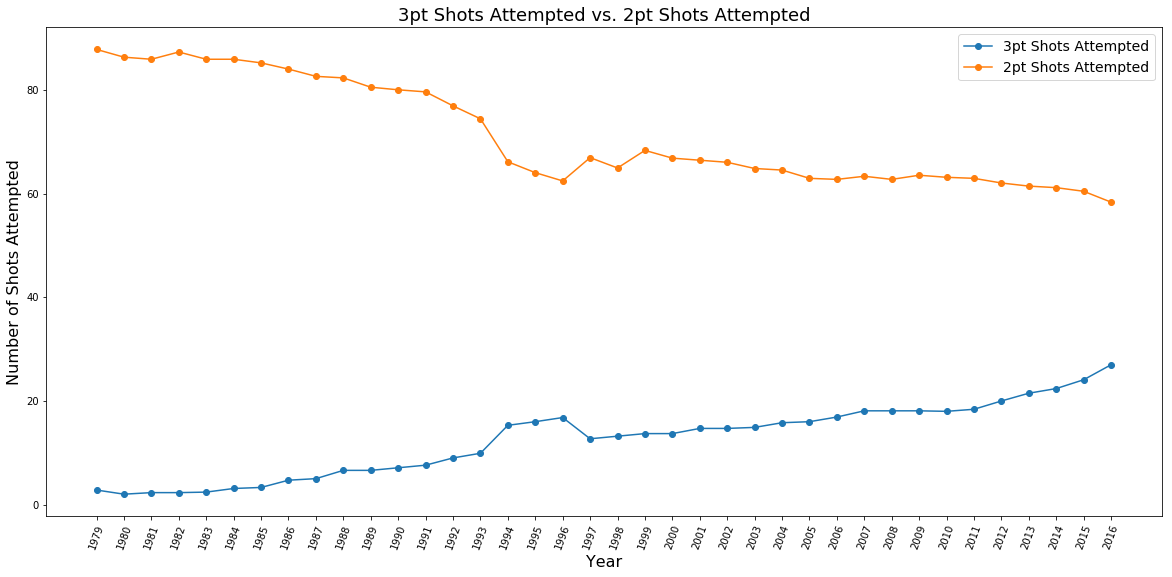

In [24]:
#First is a line graph that plots the columns 3PA and 2PA. The line graph describes the league average
#of 3 point shots attempted and 2 point shots attempted per year.

#plot columns that contain 3 point shots attempted and 2 point shots attempted
plt.plot(League_avg['3PA'], marker='o')
plt.plot(League_avg['2PA'], marker='o')

#Labels for the line graph
plt.legend(['3pt Shots Attempted', '2pt Shots Attempted'], loc='upper right', fontsize=14)
plt.ylabel('Number of Shots Attempted', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('3pt Shots Attempted vs. 2pt Shots Attempted', fontsize=18)

#set the tickmarks of the x-axis
plt.xticks(np.arange(1979, 2017))
plt.xticks(rotation=70)

#Change dimensions of the plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

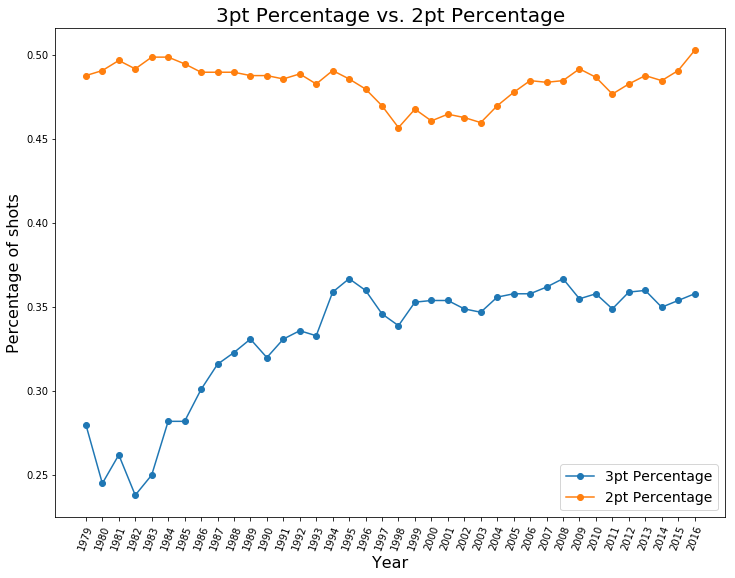

In [29]:
#Next, we graph the 3 point percentage and 2 point percentage for the entire league throughout the years.

#plot columns that contain 3 point percentage and 2 point percentage
plt.plot(League_avg['3P%'], marker='o')
plt.plot(League_avg['2P%'], marker='o')

#Labels for the plot
plt.legend(['3pt Percentage', '2pt Percentage'], loc='lower right', fontsize=14)
plt.ylabel('Percentage of shots', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('3pt Percentage vs. 2pt Percentage', fontsize=20)

#set the tickmarks of the x-axis
plt.xticks(np.arange(1979, 2017))
plt.xticks(rotation=70)

#Change dimensions of the plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

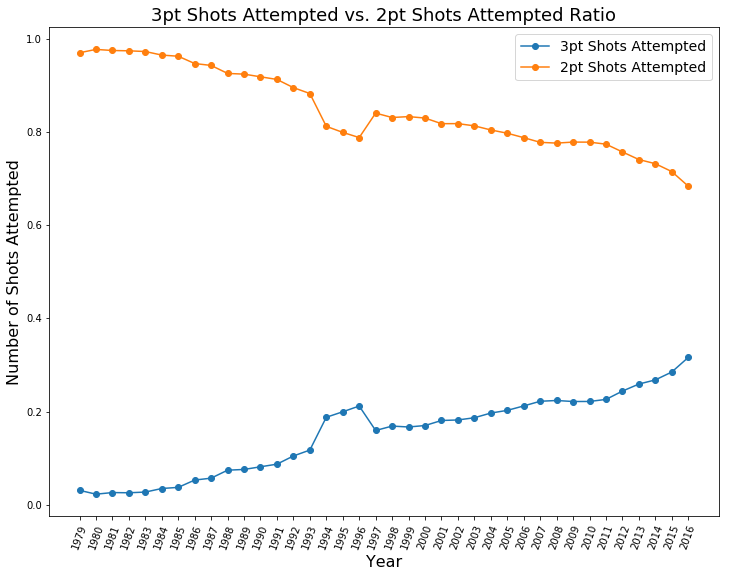

In [30]:
#For our graphs and data analysis, we look at the actual number of 3 pt attempts. Some people may say that
#it would be better to use the ratio of 3pt attempts to total shots, because a team that averages a higher amount of total shots 
#will normally have a higher amount of 3pt attempts as well. However, this graph shows us that there is little to no difference
#between a graph that displays the actual number of 3pt and 2 pt attempts(above), compared to a graph that 
#shows the ratio of 3 pt shots and 2pt shots over the total shots(below). 
#Therefore, there is no worry that our data will be affected by the total number of shots each team takes.
#We will use the actual number of 3 pt attempts in order to make our analysis look cleaner.

#plot columns that contain 3 point shots attempted and 2 point shots attempted divided by the league average
plt.plot(League_avg['3PA']/League_avg['FGA'], marker='o')
plt.plot(League_avg['2PA']/League_avg['FGA'], marker='o')

#Labels for the line graph
plt.legend(['3pt Shots Attempted', '2pt Shots Attempted'], loc='upper right', fontsize=14)
plt.ylabel('Number of Shots Attempted', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('3pt Shots Attempted vs. 2pt Shots Attempted Ratio', fontsize=18)

#set the tickmarks of the x-axis
plt.xticks(np.arange(1979, 2017))
plt.xticks(rotation=70)

#Change dimensions of the plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

                            OLS Regression Results                            
Dep. Variable:                ThreePA   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     504.1
Date:                Thu, 22 Mar 2018   Prob (F-statistic):           9.20e-23
Time:                        21:52:36   Log-Likelihood:                -75.610
No. Observations:                  38   AIC:                             155.2
Df Residuals:                      36   BIC:                             158.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3227      0.578      2.287      0.0

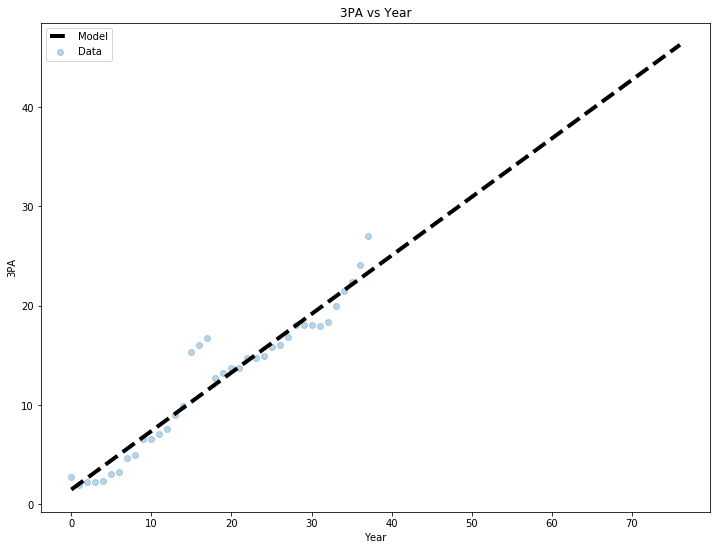

In [31]:
#resetting the index starting from 0 so our data is easier to follow
League_avg2 = League_avg2.reset_index()

#Our goal is to try and predict when the number of 3 point attempts will surpass the number of 2 point attempts. We will use
#OLS method that we did in the homeworks. This graph will give us the predicted number of 3 pt attempts per year, if the
#trend we see now were to continue.

#First we need to create a dataframe consisting of only year and 3PA data
df3p = pd.concat([League_avg2['Year'],League_avg2['3PA']], axis = 1)

#We have to rename 3PA to ThreePA, because patsy does not accept 3PA as a valid name
df3p.columns = ['Year', 'ThreePA']

#The years have to be indexes to 0, or else the graph will not show up properly
df3p['Year'] = df3p['Year'] - 1979

#Next, we will use patsy and the OLS method to figure out the slope of the line we will create to predict our data
outcome, predictors = patsy.dmatrices('ThreePA ~ Year', df3p)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

#We will form a scatter plot of our existing data, then overlay our predicted line on top of it.
plt.scatter(df3p['Year'], df3p['ThreePA'], alpha=0.3, label='Data');

#the year max is increased by so our line goes out past existing data points
xs = np.arange(df3p['Year'].min(), df3p['Year'].max()+40)

#This part is creating the graph
ys = 0.5889 * xs + 1.5028
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.title('3PA vs Year')
plt.xlabel('Year')
plt.ylabel('3PA')
plt.legend();

#We have to create a separate dataframe to hold the data we collected
predict = pd.DataFrame(xs, columns = ['Year'])
predict['3PA'] = ys
predict['Year'] = predict['Year']+1979 #the years have to be reset to their original dates


                            OLS Regression Results                            
Dep. Variable:                  TwoPA   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     233.6
Date:                Thu, 22 Mar 2018   Prob (F-statistic):           2.58e-17
Time:                        21:52:38   Log-Likelihood:                -102.73
No. Observations:                  38   AIC:                             209.5
Df Residuals:                      36   BIC:                             212.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.9393      1.181     73.630      0.0

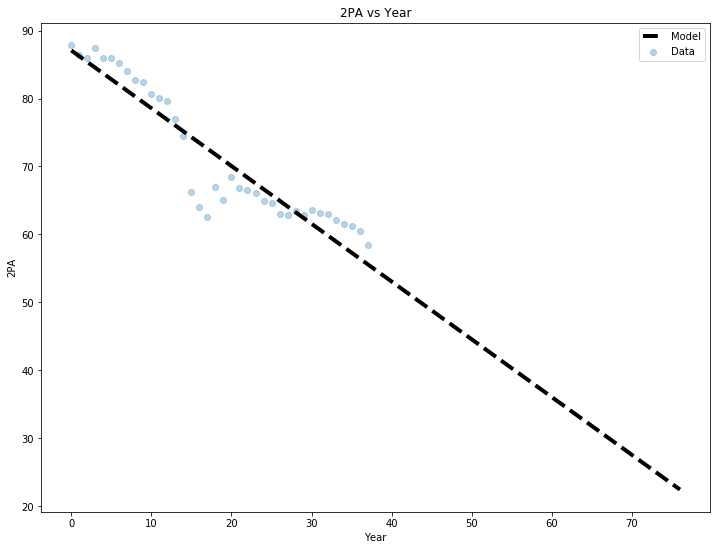

In [32]:
#We have to do the same thing we did above, but for two point attempts. This graph will give us the predicted number of 
#2 pt attempts per year, if the trend we see now were to continue.

df2p = pd.concat([League_avg2['Year'],League_avg2['2PA']], axis = 1)
df2p.columns = ['Year', 'TwoPA']
df2p['Year'] = df2p['Year'] - 1979

outcome, predictors = patsy.dmatrices('TwoPA ~ Year', df2p)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

plt.scatter(df2p['Year'], df2p['TwoPA'], alpha=0.3, label='Data');
xs = np.arange(df2p['Year'].min(), df2p['Year'].max()+40)
ys = -0.8504 * xs + 87.0748
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.title('2PA vs Year')
plt.xlabel('Year')
plt.ylabel('2PA')
plt.legend();

#Saving the predicted two point attempts data 
predict['2PA'] = ys

This is the year where three point attempts should surpass two point attempts: 2039


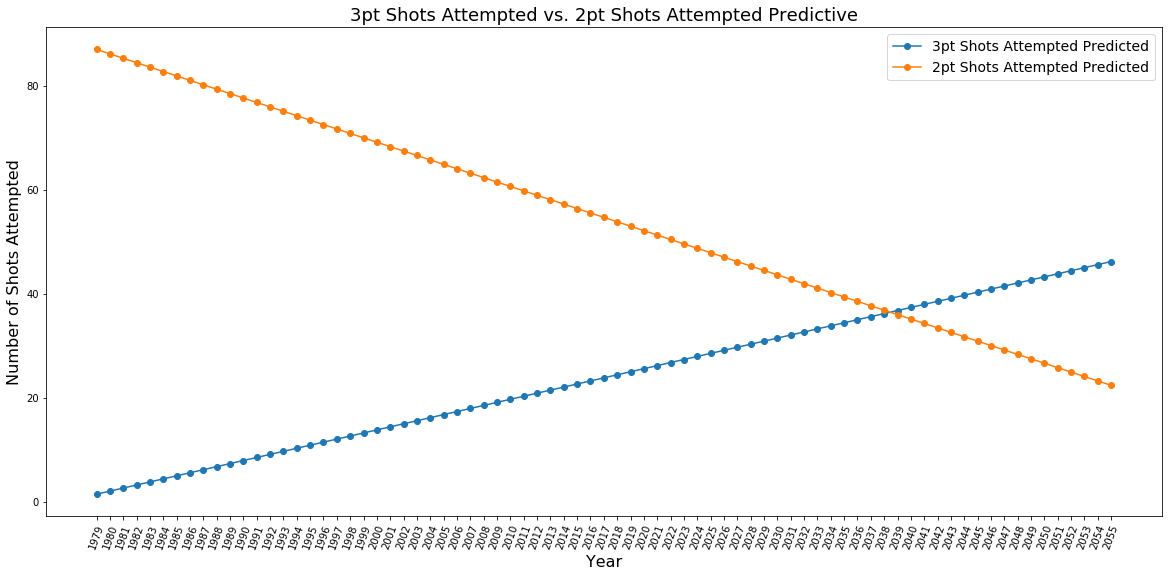

In [34]:
#Now, we will add all the data we found into one graph, so we can see when the amount of 
#3 point shot attempts will surpass the amount of 2 point shot attempts. Our code will print the year that occurs.

#Change the year back to the index
predict.index = predict['Year']

#Print out the year in which 3PA are predicted to surpass 2PA
for index, row in predict.iterrows():
    if(row['2PA'] <= row['3PA']):
        print("This is the year where three point attempts should surpass two point attempts: " + str(int(row['Year'])))
        break
#plot columns that contain 3 point shots attempted and 2 point shots attempted
plt.plot(predict['3PA'], marker='o')
plt.plot(predict['2PA'], marker='o')

#Labels for the line graph
plt.legend(['3pt Shots Attempted Predicted', '2pt Shots Attempted Predicted'], loc='upper right', fontsize=14)
plt.ylabel('Number of Shots Attempted', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('3pt Shots Attempted vs. 2pt Shots Attempted Predictive', fontsize=18)

#set the tickmarks of the x-axis
plt.xticks(np.arange(1979, 2056))
plt.xticks(rotation=70, stretch=5)

#Change dimensions of the plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

Text(0.5,1,'Weighted 3pt Effectivness Over Time')

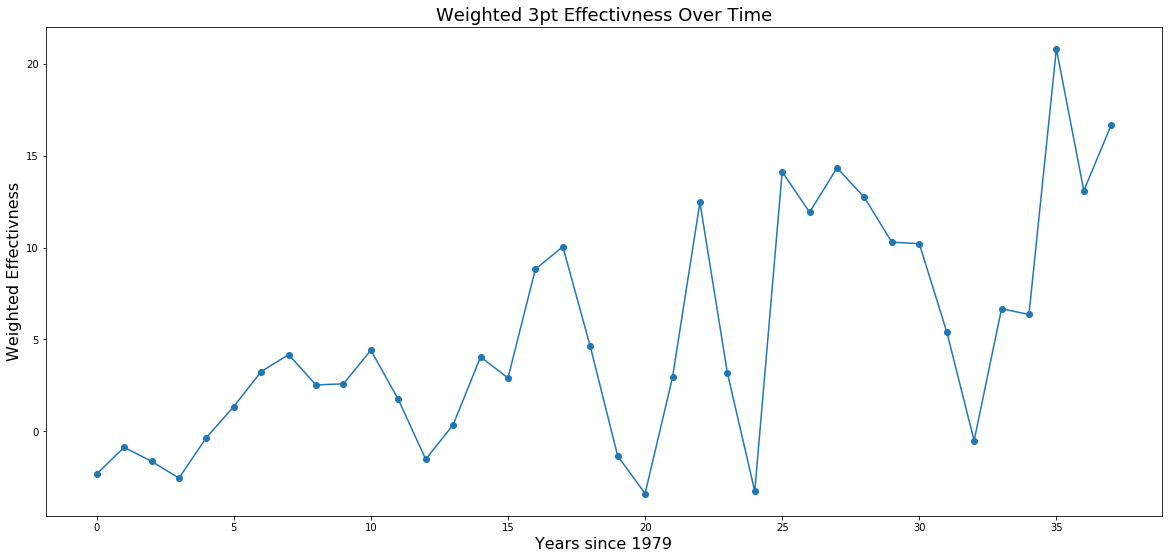

In [35]:
#Graphing the effectiveness of the 3 point shots attempted per year
aggEffectiveness = pd.DataFrame()
myArray = np.arange(0)
weightArray = 16 - np.arange(16)
weightedEffectiveness = 0
for index, row in effectiveness.iterrows():
    weightedEffectiveness = 0
    for x in np.arange(16):
        weightedEffectiveness = weightedEffectiveness + row[str(x)] * weightArray[x]
    myArray = np.append(myArray, weightedEffectiveness / 16)
aggEffectiveness['Weighted'] = myArray
aggEffectiveness['Year'] = League_avg.index



plt.plot(aggEffectiveness['Weighted'], marker='o')

plt.ylabel('Weighted Effectivness', fontsize=16)
plt.xlabel('Years since 1979', fontsize=16)
plt.title('Weighted 3pt Effectivness Over Time', fontsize=18)



## Part 5 - Data Analysis 

When starting out with this project, our group noticed that there seems to be a recent trend in the NBA of focusing more on the three-point shot than in years past. We also suspected that the two-pointer was losing its flare and that there might be a correlation between the attempted two- and three-pointers. In order to analyze this, we accrued data about the league average from every NBA season since 1979. By plotting the average number of three-point attempts and average number of two-point attempts for a team in each season, we were able to corroborate that the number of three pointers attempted by a team has steadily increased since 1979 while the number of two-point attempts has steadily decreased. 

Afraid that the league average for three-point attempts or two-point attempts in any particular season might be skewed by a team taking many more of a particular shot than the average team, or an outlier season in which teams took more shots than normal, we decided to also plot the ratio of three-point and two-point attempts for every season. We did this by dividing the average number of three-point attempts and two-point attempts by the total number of average field goal attempts for each season, so as to remedy these fears. However, when we plotted our results we arrived with the same result that the number of 3PA and 2PA are inversely correlated, with three-pointers increasing and two-pointers decreasing over time.

Given this new information, we decided to predict when the avarage number of three-point attempts would surpass the average number of two-point attempts in the NBA. In order to do this, we performed OLS regressions on both the 3PA over time and 2PA over time. Plotting the results of our regressions, we were able to predict that 2039 is the year when there will be more 3PA than 2PA in the NBA. 

With the increase in the number of 3PA since 1979, we wanted to see whether there was also a change in the field goal percentage of each shot over time. However, by plotting the average field goal percentage of each shot for every season, we were unable to find any significiant trend. While the two-point FG% hasn't changed too much overall with slight variation from year-to-year, there seems to be a prominent increase in three-point FG% from 1979-1995. However, since 1995 there doesn't seem to be any drastic change in the three-point FG% and the pattern is similar to two-point FG%. This is probably attributed to the fact that the three-pointer was originally introduced in 1979 and it took players some time in order to acquaint themselves with the shot. 

The primary question we were trying to address with our project was whether or not focusing heavily on the three-point shot was an effective strategy or not, given the trend towards taking more three-pointers. In order to gauge the "effectiveness" of relying heavily on the three-pointer as a succesful strategy, we decided to analyze data from 1979, the season the three-pointer was introduced in the NBA. Our procedure consisted of aggregating the top 16 teams in the league for each season, and comparing the average number of three-point attempts(3PA) of each team to the league average for that season. Then, we calculated the weighted average for each season by subtracting the league average 3PA from the 3PA of each of the top 16 teams, and multiplying each entry by a weight based off of the team's rank during the season. We finally average the 16 results we get from this procedure to generate a weighted average number of 3PA for the top 16 teams compared to the league average for a given season. By plotting this weighted average across all NBA seasons from 1979-2017, we were able to visualize the weighted three-point effectiveness over time. Our graph reveals that there are many more seasons with a positive effectiveness than a negative effectiveness, and the general trend shows an increase in the "effectiveness" of employing a three-point driven strategy. However, given the drastic variations from year to year, we cannot conclusively decide that the effectiveness of the strategy has gone up, but rather only note that there is an upward trend in the general pattern of the effectiveness.


## Part 6 - Privacy and Ethics Considerations

Due to the overtly public nature of this data we do not have sizeable concerns regarding privacy. The data sets we utilized only included team names and are otherwise free of any potentially vulnerable or personal information. If we wanted to we could have anonimized the data by changing the team labels to arbitrary names. One main reason for doing this might be to ensure that the anaylsis of any trends or patterns would not be influenced by outside knowledge of the teams. However, we decided that because of the objectivity of our research question this step was unnecessary. 

The website we sourced our data from, Basketball-Reference, was very conducive to data sharing. We assured that the Basketball-Reference permitted the use of their tables and data. Basketball-Reference also provided custom data sets if the data researchers sought was not already listed on their site, though these specialized sets came at a price. Luckily we were able to find the appropriate data for our question in their already publically listed tables. 


As a result of the objective quality of sports statistics, we are confident that the data sets we used are unbiased.   

## Part 7 - Conclusion and Discussion

Through our project, we were able to reach some interesting conclusions. First off, we were able to determine that the number of three-point attempts in the NBA is inversely correlated with the number of two-point attempts in the NBA, with the number of 3PA steadily rising and number of 2PA steadily decreasing since 1979. In addition, we were able to determine that this doesn't necessarily mean that NBA players have become better three-point shooters, as the average two-point field goal percentage has remained relatively consistent since 1979 and the average three-point field goal percentage has remained relatively consistent since 1995, with a spike from 1979 to 1995 that we suspect might be due to the novelty of the three-point shot but have not done research on. Finally, arguably the most intriguing finding of our project is that the overall effectiveness of the three-point shot in the game seems to be increasing since 1979. Hence, our data analysis supports our hypothesis that a three-point focused game strategy is indeed recommended over a two-point strategy and is effective in winning games. 

Our findings suggest that the trend of recent NBA teams such as the Warriors prioritizing the three-pointer is warranted, as our analysis shows that the benefit of the extra point from a three-pointer outweight its increased difficulty compared to a regular field goal. Based off of our findings, we could also debilitate arguments around the NBA from commentators, playors, and others that the game has deteriorated in quality and that the new strategies of three pointers have made it an easier league, since our evidence shows that the strategy of taking more threes is actually more effective. 

While our findings do support the claim that taking more three-pointers is an effective strategy, our analysis is rudimentary and not definite. The likelihood of exclusively taking three-pointers as an effective strategy is probably not true, and while our analysis compares the number of three pointers taken by top teams compared to average teams, it does not take the field goal percentage of a three pointer into account. Therefore, there has not yet been a thorough analysis done that contrasts the three-point field goal percentage to normal field goal percentage, and results from this analysis might question our results. In addition, because of this additional variable, skeptics might question the validity of our claims, but by historically comparing the success of teams we have been able to reach the insight that the more succesful teams have taken more three pointers than average and this effectiveness has shown an increasing trend. In addition, other pitfalls include the way we performed our OLS regression. There is a good posibility that we were too generous in our assumptions during extrapolation and the current trend will not continue in the same way until 2039. Hence, there is a good possibility that the number of three-point attempts will not surpass the number number of two-point attempts in exactly 2039 unless the trends stay exactly the same.